# Credit _Risk Prediction

## Loading Dataset and Required Libraries

In [51]:
# at the top of the file, before other imports
import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on

In [52]:
#loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import statistics as st
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [53]:
#importing the dataset
df = pd.read_csv("D:/data science/exercise files/Credit_Risk_Train_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
#checking the shape of the data
df.shape

(614, 13)

In [55]:
#data overview steps before data cleaning just ton understand data
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [56]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [58]:
df_desc = df.describe(include='all')
df_desc

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001206,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## Data Preprocessing

In [59]:
# Getting the uniQue Values
for val in df:
    print(val, " ", df[val].unique().shape)

Loan_ID   (614,)
Gender   (3,)
Married   (3,)
Dependents   (5,)
Education   (2,)
Self_Employed   (3,)
ApplicantIncome   (505,)
CoapplicantIncome   (287,)
LoanAmount   (204,)
Loan_Amount_Term   (11,)
Credit_History   (3,)
Property_Area   (3,)
Loan_Status   (2,)


In [60]:
# dealing with UniQue, or same value columns.
df.drop("Loan_ID", axis=1, inplace=True)

In [61]:
# Converting column type
df["Credit_History"] = df["Credit_History"].astype("object")

In [62]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [63]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [64]:
# Counting the freQunecy of variables to check the baisness
for val in df:
    if df[val].dtypes == "object":
        print(df[val].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [65]:
# Checking the single value domination/biased
quasi_constant_feat = []
for feature in df.columns:
    dominant = (df[feature].value_counts() / np.float(len(df))).sort_values(ascending=False).values[0]
    if dominant > 0.95:
       quasi_constant_feat.append(feature)

print(quasi_constant_feat)

[]


In [66]:
### Null Value analysis & treatment.
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [67]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
for val in df:
    print(val, " ", (df[val].isnull().sum() / df.shape[0]) * 100)

Gender   2.1172638436482085
Married   0.4885993485342019
Dependents   2.44299674267101
Education   0.0
Self_Employed   5.211726384364821
ApplicantIncome   0.0
CoapplicantIncome   0.0
LoanAmount   3.5830618892508146
Loan_Amount_Term   2.2801302931596092
Credit_History   8.143322475570033
Property_Area   0.0
Loan_Status   0.0


In [69]:
# No of rows getting affctected by removing na's
no_of_rows = df[df.isna().sum(axis=1) >= 1].shape[0]

In [70]:
# % of rows getting affcted by removing Na's from column.
print((no_of_rows / df.shape[0]) * 100)

21.824104234527688


In [71]:
#  Imputation according to data type
def imputenull(data):
    for col in data.columns:
        if data[col].dtypes == 'int64' or data[col].dtypes == 'float64':
           data[col].fillna((data[col].mean()), inplace=True)
        else:
            data[col].fillna(data[col].value_counts().index[0], inplace=True)


imputenull(df)

In [72]:
# Now checking on the dataset after imputing the columns
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis

In [73]:
# Converting column type
df["Credit_History"] = df["Credit_History"].astype("object")

In [74]:
#segregate the data
df_num = df.select_dtypes(include=['int64','float64' ])
df_fac = df.select_dtypes(include=['object'])

In [75]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [76]:
df_fac.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

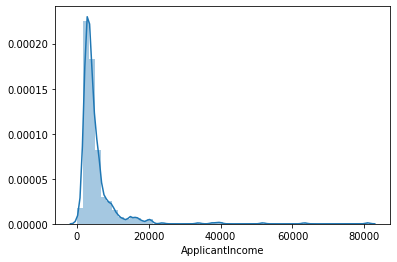

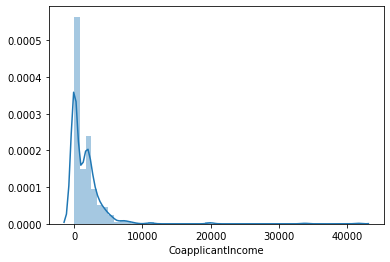

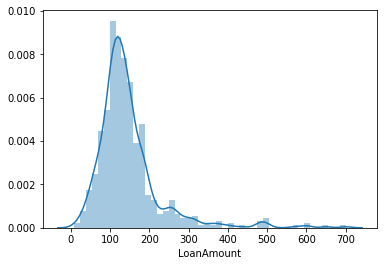

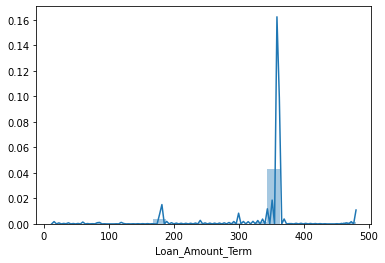

In [77]:
##plotting histogram for all numeric column
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.distplot(df_num[col])

In [78]:
fac_feature = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status']

In [79]:
list(enumerate(fac_feature))

[(0, 'Gender'),
 (1, 'Married'),
 (2, 'Dependents'),
 (3, 'Education'),
 (4, 'Self_Employed'),
 (5, 'Credit_History'),
 (6, 'Property_Area'),
 (7, 'Loan_Status')]

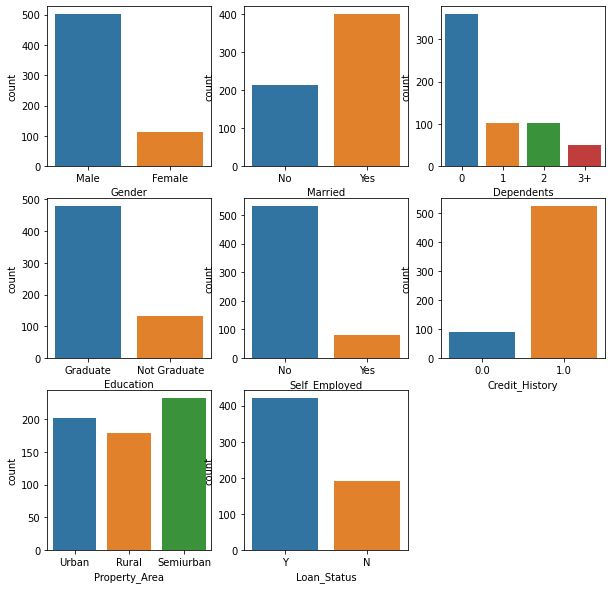

In [80]:
##Plotting barplot for all categorical columns
plt.figure(figsize= (10,10))
for i in enumerate(fac_feature):
    plt.subplot(3,3,i[0]+1)
    sns.countplot(i[1],data= df_fac)
    

## Data Splitting

In [81]:
# Training & Test split of data
tar_var = df['Loan_Status']
df.drop("Loan_Status", axis=1, inplace=True)

In [82]:
# Converting in dummies
df = pd.get_dummies(df, drop_first=False)
df.shape

(614, 21)

In [162]:
#Spliting now.
x_train,x_test,y_train,y_test = train_test_split(df, tar_var, random_state = 10,test_size = 0.2)

In [163]:
x_train.shape

(491, 21)

In [164]:
x_test.shape

(123, 21)

In [165]:
y_train.shape

(491,)

In [166]:
y_test.shape

(123,)

## Model Creation & Validation

### 1.Logistic Regression

In [167]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [168]:
# train the model using the training sets
log_model.fit(x_train, y_train)

LogisticRegression()

In [169]:
# making predictions on the testing set
y_pred = log_model.predict(x_test)

In [170]:
pred_prob = log_model.predict_proba(x_test)
pred_prob

array([[0.38336342, 0.61663658],
       [0.43017345, 0.56982655],
       [0.08972887, 0.91027113],
       [0.10827584, 0.89172416],
       [0.17251773, 0.82748227],
       [0.13846459, 0.86153541],
       [0.66379793, 0.33620207],
       [0.07254828, 0.92745172],
       [0.19292785, 0.80707215],
       [0.28580967, 0.71419033],
       [0.10984024, 0.89015976],
       [0.20666312, 0.79333688],
       [0.07100822, 0.92899178],
       [0.2031379 , 0.7968621 ],
       [0.93130698, 0.06869302],
       [0.26739656, 0.73260344],
       [0.16880736, 0.83119264],
       [0.1454873 , 0.8545127 ],
       [0.50851334, 0.49148666],
       [0.33490368, 0.66509632],
       [0.17907051, 0.82092949],
       [0.063828  , 0.936172  ],
       [0.23601682, 0.76398318],
       [0.85708198, 0.14291802],
       [0.23280658, 0.76719342],
       [0.24804777, 0.75195223],
       [0.1696128 , 0.8303872 ],
       [0.31017911, 0.68982089],
       [0.18679886, 0.81320114],
       [0.22404022, 0.77595978],
       [0.

In [171]:
# comparing actual response values (y_test) with predicted response values (y_pred)
metrics.accuracy_score(y_test, y_pred) * 100

78.86178861788618

In [172]:
print(metrics.confusion_matrix(y_test, y_pred))

[[14 22]
 [ 4 83]]


In [173]:
# save confusion matrix and slice into four pieces---- deep diving into confusion matrix
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[14 22]
 [ 4 83]]


In [174]:
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [175]:
# Converting the categorical output into numerical output
lst_test =[]
for val in y_test:
    x = 1 if(val == "Y") else 0
    lst_test.append(x)
    
lst_pred =[]
for val in y_pred:
    x = 1 if(val == "Y") else 0
    lst_pred.append(x)

In [176]:
print((TP + TN) / float(TP + TN + FP + FN))                 #Accuracy by calculation
print(metrics.accuracy_score(lst_test, lst_pred))         # Confusion maytrix

0.7886178861788617
0.7886178861788617


In [177]:
classification_error = (FP + FN) / float(TP + TN + FP + FN) #Error
print(classification_error*100)
print((1 - metrics.accuracy_score(lst_test, lst_pred))*100)

21.138211382113823
21.138211382113823


In [178]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(lst_test, lst_pred))

0.9540229885057471
0.9540229885057471


In [179]:
specificity = TN / (TN + FP)
print(specificity)

0.3888888888888889


In [180]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.6111111111111112
0.6111111111111112


In [181]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(lst_test, lst_pred))

0.7904761904761904
0.7904761904761904


In [182]:
# F1 Score FORMULA
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)
print(F1)

0.8645833333333333


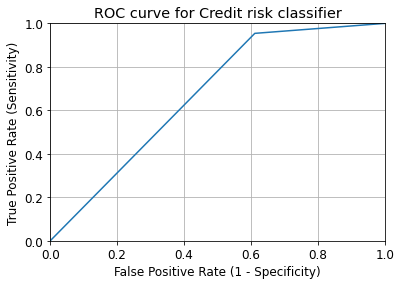

In [183]:
fpr, tpr, thresholds = metrics.roc_curve(lst_test, lst_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Credit risk classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [184]:
print(metrics.roc_auc_score(lst_test, lst_pred))

0.671455938697318


In [185]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_model, x_train, y_train, cv=10, scoring='roc_auc').mean()

0.7679300356506238

In [186]:
log_accuracy= metrics.accuracy_score(lst_test, lst_pred)
log_recall= metrics.recall_score(lst_test, lst_pred)
log_precision= metrics.precision_score(lst_test, lst_pred)
log_roc_auc= metrics.roc_auc_score(lst_test, lst_pred)

### 2.Decision Tree

In [187]:
# Applying Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

[Text(130.8588022237197, 211.4, 'X[17] <= 0.5\ngini = 0.434\nsamples = 491\nvalue = [156, 335]'),
 Text(30.682479784366578, 199.32, 'X[2] <= 547.5\ngini = 0.145\nsamples = 76\nvalue = [70, 6]'),
 Text(27.072776280323453, 187.24, 'X[1] <= 8115.0\ngini = 0.124\nsamples = 75\nvalue = [70, 5]'),
 Text(18.048517520215633, 175.16, 'X[2] <= 159.0\ngini = 0.104\nsamples = 73\nvalue = [69, 4]'),
 Text(10.82911051212938, 163.07999999999998, 'X[3] <= 240.0\ngini = 0.036\nsamples = 54\nvalue = [53, 1]'),
 Text(7.219407008086254, 151.0, 'X[0] <= 2568.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(3.609703504043127, 138.92000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.82911051212938, 138.92000000000002, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(14.438814016172508, 151.0, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(25.26792452830189, 163.07999999999998, 'X[2] <= 172.0\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(21.65822102425876, 151.0, 'X[19] <= 0.

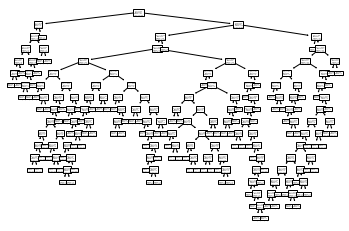

In [189]:
from sklearn import tree
tree.plot_tree(DT.fit(x_train, y_train))

In [190]:
# Predicting values form decision tree
y_pred = DT.predict(x_test)

In [191]:
# Model Accuracy and Confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 69.91869918699187
[[17 19]
 [18 69]]


In [192]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[17 19]
 [18 69]]


In [193]:
# Converting the categorical output into numerical output
lst_test =[]
for val in y_test:
    x = 1 if(val == "Y") else 0
    lst_test.append(x)
    
lst_pred =[]
for val in y_pred:
    x = 1 if(val == "Y") else 0
    lst_pred.append(x)

In [194]:
# Accuracy by calculation & built-in fuction
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(lst_test, lst_pred))

0.6991869918699187
0.6991869918699187


In [195]:
classification_error = (FP + FN) / float(TP + TN + FP + FN) #Error
print(classification_error*100)
print((1 - metrics.accuracy_score(lst_test, lst_pred))*100)

30.081300813008134
30.081300813008127


In [196]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(lst_test, lst_pred))

0.7931034482758621
0.7931034482758621


In [197]:
specificity = TN / (TN + FP)
print(specificity)

0.4722222222222222


In [198]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.5277777777777778
0.5277777777777778


In [199]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(lst_test, lst_pred))

0.7840909090909091
0.7840909090909091


In [200]:
# F1 Score FORMULA
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)
print(F1)

0.7885714285714285


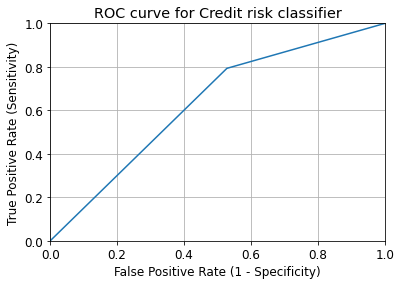

In [201]:
fpr, tpr, thresholds = metrics.roc_curve(lst_test, lst_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Credit risk classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [202]:
print(metrics.roc_auc_score(lst_test, lst_pred))

0.6326628352490422


In [203]:
from sklearn.model_selection import cross_val_score
cross_val_score(DT, x_train, y_train, cv=10, scoring='roc_auc').mean()

0.6553687611408201

In [204]:
DT_accuracy= metrics.accuracy_score(lst_test, lst_pred)
DT_recall= metrics.recall_score(lst_test, lst_pred)
DT_precision= metrics.precision_score(lst_test, lst_pred)
DT_roc_auc= metrics.roc_auc_score(lst_test, lst_pred)

### 3.Random Forest

In [205]:
# Fitting Random Forest classifier to the dataset
# import the classifier
from sklearn.ensemble import RandomForestClassifier
# create classifier object
RF = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [206]:
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [208]:
# making predictions on the testing set
y_pred = RF.predict(x_test)

In [209]:
# Model Accuracy and Confusion matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 77.23577235772358
[[14 22]
 [ 6 81]]


In [210]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[14 22]
 [ 6 81]]


In [211]:
# Converting the categorical output into numerical output
lst_test =[]
for val in y_test:
    x = 1 if(val == "Y") else 0
    lst_test.append(x)
    
lst_pred =[]
for val in y_pred:
    x = 1 if(val == "Y") else 0
    lst_pred.append(x)

In [212]:
# Accuracy by calculation & built-in fuction
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(lst_test, lst_pred))

0.7723577235772358
0.7723577235772358


In [213]:
classification_error = (FP + FN) / float(TP + TN + FP + FN) #Error
print(classification_error*100)
print((1 - metrics.accuracy_score(lst_test, lst_pred))*100)

22.76422764227642
22.764227642276424


In [214]:
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(lst_test, lst_pred))

0.9310344827586207
0.9310344827586207


In [215]:
specificity = TN / (TN + FP)
print(specificity)

0.3888888888888889


In [216]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.6111111111111112
0.6111111111111112


In [217]:
precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(lst_test, lst_pred))

0.7864077669902912
0.7864077669902912


In [218]:
# F1 Score FORMULA
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)
print(F1)

0.8526315789473684


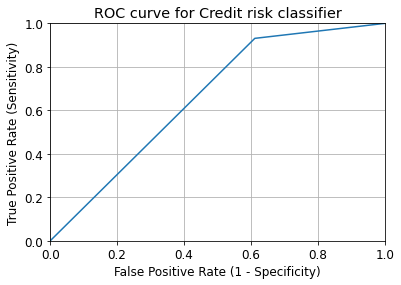

In [219]:
fpr, tpr, thresholds = metrics.roc_curve(lst_test, lst_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Credit risk classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [220]:
print(metrics.roc_auc_score(lst_test, lst_pred))

0.6599616858237547


In [221]:
RF_accuracy= metrics.accuracy_score(lst_test, lst_pred)
RF_recall= metrics.recall_score(lst_test, lst_pred)
RF_precision= metrics.precision_score(lst_test, lst_pred)
RF_roc_auc= metrics.roc_auc_score(lst_test, lst_pred)

## Comparing all models performance

In [222]:
Results = { 'Accuracy' : [log_accuracy,DT_accuracy,RF_accuracy],
            'Recall' : [log_recall,DT_recall,RF_recall],
            'Precision' : [log_precision,DT_precision,RF_precision],
            'Roc_auc' : [log_roc_auc,DT_roc_auc,RF_roc_auc]
          }

Result_matrix = pd.DataFrame(Results, columns = ['Accuracy','Recall','Precision','Roc_auc'], index=['Logistic_regression','Decision_tree','Random_forest'])
print(Result_matrix)

                     Accuracy    Recall  Precision   Roc_auc
Logistic_regression  0.788618  0.954023   0.790476  0.671456
Decision_tree        0.699187  0.793103   0.784091  0.632663
Random_forest        0.772358  0.931034   0.786408  0.659962


## Conclusion
- after comparing all three models result we can see logistic regression is giving best performance results